<a href="https://colab.research.google.com/github/mateosuster/nlpPapers/blob/main/code/05_LDA_TopicModels_GENSIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencias

In [2]:
%%capture
!pip install pyLDAvis==2.1.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from collections import Counter
import numpy as np
from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from gensim import corpora

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import os, re, operator, warnings
warnings.filterwarnings('ignore')  
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


# Data

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/mateosuster/nlpPapers/main/code/data/ACL_data.csv")
data.head()

,YEAR,TITLE,ABSTRACT,AUTHOR,PUBLISHER,BOOKTITLE,CATEGORY
0,2022,A Systematic Survey of Text Worlds as Embodied...,Text Worlds are virtual environments for embod...,"Jansen, Peter",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
1,2022,A Minimal Computational Improviser Based on Or...,A prototype system for playing a minimal impro...,"Montfort, Nick and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
2,2022,Craft an Iron Sword: Dynamically Generating In...,Non-Player Characters (NPCs) significantly enh...,"Volum, Ryan and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
3,2022,A Sequence Modelling Approach to Question Answ...,Interactive Question Answering (IQA) requires ...,"Furman, Gregory and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
4,2022,Automatic Exploration of Textual Environments ...,The purpose of this extended abstract is to di...,"Teodorescu, Laetitia and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS


In [5]:
#from sklearn.datasets import fetch_20newsgroups
#dataset = fetch_20newsgroups(shuffle=True, random_state=1,remove=('headers', 'footers', 'quotes')).data
dataset = data.ABSTRACT
#type(dataset)
dataset = dataset.tolist()
dataset[0]

'Text Worlds are virtual environments for embodied agents that, unlike 2D or 3D environments, are rendered exclusively using textual descriptions. These environments offer an alternative to higher-fidelity 3D environments due to their low barrier to entry, providing the ability to study semantics, compositional inference, and other high-level tasks with rich action spaces while controlling for perceptual input. This systematic survey outlines recent developments in tooling, environments, and agent modeling for Text Worlds, while examining recent trends in knowledge graphs, common sense reasoning, transfer learning of Text World performance to higher-fidelity environments, as well as near-term development targets that, once achieved, make Text Worlds an attractive general research paradigm for natural language processing.'

In [6]:
type(dataset)
#fetch_20newsgroups

list

# Preproc

## Limpieza

In [7]:
STOP_WORDS = stopwords.words("english")

def tokenize(x):
    return [word for word in word_tokenize(x) if word not in STOP_WORDS and word.isalpha() and len(word)>1]
    
texts= [tokenize(str(doc).lower()) for doc in dataset]


In [8]:
print(texts[0])

['text', 'worlds', 'virtual', 'environments', 'embodied', 'agents', 'unlike', 'environments', 'rendered', 'exclusively', 'using', 'textual', 'descriptions', 'environments', 'offer', 'alternative', 'environments', 'due', 'low', 'barrier', 'entry', 'providing', 'ability', 'study', 'semantics', 'compositional', 'inference', 'tasks', 'rich', 'action', 'spaces', 'controlling', 'perceptual', 'input', 'systematic', 'survey', 'outlines', 'recent', 'developments', 'tooling', 'environments', 'agent', 'modeling', 'text', 'worlds', 'examining', 'recent', 'trends', 'knowledge', 'graphs', 'common', 'sense', 'reasoning', 'transfer', 'learning', 'text', 'world', 'performance', 'environments', 'well', 'development', 'targets', 'achieved', 'make', 'text', 'worlds', 'attractive', 'general', 'research', 'paradigm', 'natural', 'language', 'processing']


## Ajuste para LDA

In [9]:
dictionary = corpora.Dictionary(texts)
print(len(dictionary))
dictionary.filter_extremes(no_below=10, no_above=0.5)
print(len(dictionary))

48159
10142


In [10]:
corpus = [dictionary.doc2bow(text) for text in texts]

## LDA

In [11]:
semilla = 420

In [12]:
lsamodel = LsiModel(corpus=corpus, num_topics=25, id2word=dictionary
                    # , random_seed = semilla
                    )

TypeError: ignored

In [ ]:
lsamodel.print_topics(10,4)


[(0, '0.295*"model" + 0.283*"language" + 0.262*"models" + 0.226*"data"'),
 (1, '-0.681*"de" + -0.280*"la" + -0.280*"des" + -0.245*"les"'),
 (2,
  '-0.448*"translation" + 0.447*"model" + -0.317*"language" + 0.284*"models"'),
 (3,
  '0.705*"language" + -0.338*"translation" + 0.316*"models" + -0.207*"system"'),
 (4, '0.548*"translation" + 0.355*"model" + 0.303*"models" + -0.246*"corpus"'),
 (5, '-0.805*"data" + 0.262*"word" + -0.232*"training" + 0.206*"language"'),
 (6, '-0.641*"model" + 0.617*"models" + -0.257*"language" + -0.162*"data"'),
 (7, '-0.536*"word" + 0.463*"task" + 0.285*"system" + -0.238*"embeddings"'),
 (8, '-0.564*"task" + -0.378*"word" + 0.284*"corpus" + -0.198*"embeddings"'),
 (9, '-0.469*"corpus" + -0.356*"models" + -0.274*"model" + 0.273*"knowledge"')]

In [ ]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary, iterations = 2000, passes=10
                    # , random_seed = semilla
                    )


In [ ]:
ldamodel.print_topics(10, 8)

[(0,
  '0.014*"information" + 0.010*"text" + 0.009*"analysis" + 0.008*"documents" + 0.008*"social" + 0.008*"sentiment" + 0.008*"news" + 0.007*"users"'),
 (1,
  '0.015*"evaluation" + 0.012*"human" + 0.008*"results" + 0.007*"text" + 0.007*"automatic" + 0.007*"study" + 0.006*"different" + 0.006*"metrics"'),
 (2,
  '0.030*"model" + 0.023*"models" + 0.012*"learning" + 0.011*"propose" + 0.011*"performance" + 0.011*"show" + 0.011*"neural" + 0.011*"tasks"'),
 (3,
  '0.044*"task" + 0.042*"system" + 0.022*"paper" + 0.017*"model" + 0.017*"features" + 0.015*"results" + 0.014*"shared" + 0.011*"classification"'),
 (4,
  '0.016*"speech" + 0.011*"parser" + 0.011*"grammar" + 0.010*"errors" + 0.010*"error" + 0.009*"ontology" + 0.008*"algorithm" + 0.007*"recognition"'),
 (5,
  '0.078*"de" + 0.033*"des" + 0.032*"la" + 0.027*"les" + 0.025*"et" + 0.021*"un" + 0.021*"le" + 0.020*"une"'),
 (6,
  '0.039*"word" + 0.030*"semantic" + 0.025*"words" + 0.017*"lexical" + 0.016*"syntactic" + 0.016*"parsing" + 0.015*"i

In [ ]:
new_text = dataset[0]

# transform held_out_text into the bag-of-words space
bow_vector = dictionary.doc2bow(tokenize(new_text.lower()))
lda_vector = ldamodel[bow_vector]
print(lda_vector)
# print the document's single most prominent LDA topic
print(ldamodel.print_topic(max(lda_vector, key=lambda item: item[1])[0]))

[(0, 0.0442734), (1, 0.12519147), (2, 0.28757638), (4, 0.07169536), (5, 0.042707674), (7, 0.122924335), (8, 0.30152035)]
0.019*"question" + 0.018*"dialogue" + 0.015*"system" + 0.015*"knowledge" + 0.013*"questions" + 0.011*"information" + 0.011*"user" + 0.011*"systems" + 0.009*"generation" + 0.008*"dataset"


In [ ]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.097855 -0.079416       1        1  26.170669
9      0.099078 -0.038675       2        1  11.460142
1      0.079743  0.063833       3        1  11.036035
7      0.033135 -0.006194       4        1   9.272911
0      0.040081  0.025009       5        1   9.225107
8      0.065611 -0.098139       6        1   7.689999
6     -0.009030  0.306398       7        1   6.833015
5     -0.520577 -0.042327       8        1   6.402450
3      0.055401 -0.165743       9        1   6.233653
4      0.058704  0.035253      10        1   5.676019, topic_info=             Term          Freq         Total Category  logprob  loglift
4831           de  12795.000000  12795.000000  Default  30.0000  30.0000
1518  translation  13660.000000  13660.000000  Default  29.0000  29.0000
234          task  15172.000000  15172.000000  Default  28.0000  28.0000
118        system  14868.000000  14868.000000  Default  27.0000  27.0000
97          model  25202.000000  25202.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
1101         used    631.279987   8544.035340  Topic10  -5.4458   0.2637
112          show    553.374658  11726.592622  Topic10  -5.5775  -0.1847
236      training    536.796431   8500.365231  Topic10  -5.6079   0.1067
1143       number    511.590771   3201.766958  Topic10  -5.6560   1.0350
466     automatic    515.855210   4492.311473  Topic10  -5.6477   0.7046

[696 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1184      3  0.995955  abstractive
176       1  0.318508     accuracy
176       2  0.126355     accuracy
176       3  0.044041     accuracy
176       5  0.001049     accuracy
...     ...       ...          ...
123      10  0.034770         work
5977      4  0.996109     workflow
4552      7  0.996618          wsd
3479      5  0.189801         year
3479      9  0.807132         year

[1605 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 2, 8, 1, 9, 7, 6, 4, 5])

topicos de sklearn


1 embedings
6 sequence 2 sequence
3 herramientas - implementacion
7 palabras en otro idioma? articulos? parte de nombres?
9 emotions analysis (hater etc)
5 computation and social sceince,

promediar la distribucion para todos los años y ver como se distribuyo para cada año y decir este año el topico no fue tan frecuente

In [ ]:
lsatopics  = [[word for word, prob in topic] for topicid, topic in lsamodel.show_topics(10,formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(10,formatted=False)]

In [ ]:
ldatopics[0]

['information',
 'text',
 'analysis',
 'documents',
 'social',
 'sentiment',
 'news',
 'users',
 'event',
 'extraction']

In [ ]:
lsa_coherence = CoherenceModel(topics=lsatopics, texts=texts, dictionary=dictionary, window_size=30,coherence='c_npmi',topn=5).get_coherence_per_topic()
lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=30,coherence='c_npmi',topn=5).get_coherence_per_topic()

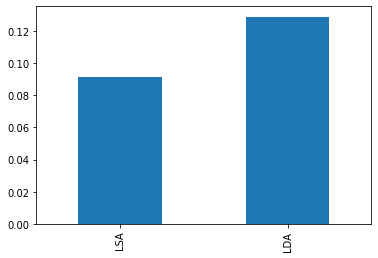

In [ ]:
df_lda = pd.DataFrame([range(10),lda_coherence,ldatopics],index=['topic_id','coherence','topic']).transpose()
df_lsa = pd.DataFrame([range(10),lsa_coherence,lsatopics],index=['topic_id','coherence','topic']).transpose()
pd.Series({'LSA':np.mean(lsa_coherence),'LDA':np.mean(lda_coherence)}).plot.bar();

In [ ]:
df_lda.sort_values(by='coherence',ascending=False)

,topic_id,coherence,topic
5,5,0.555164,"[de, des, la, les, et, un, le, une, nous, en]"
6,6,0.168902,"[word, semantic, words, lexical, syntactic, pa..."
9,9,0.135183,"[translation, machine, languages, language, da..."
4,4,0.106065,"[speech, parser, grammar, errors, error, ontol..."
1,1,0.089009,"[evaluation, human, results, text, automatic, ..."
2,2,0.079501,"[model, models, learning, propose, performance..."
8,8,0.073562,"[question, dialogue, system, knowledge, questi..."
7,7,0.029253,"[corpus, language, annotation, paper, data, re..."
3,3,0.026759,"[task, system, paper, model, features, results..."
0,0,0.02665,"[information, text, analysis, documents, socia..."
